In [229]:
import pandas as pd

pokemon = pd.read_csv('./pokedex/pokemon.csv').sort_values(by=['number'])
pokemon

,generation,number,name,image,type1,type2,height,weight,catch_rate,egg_group1,...,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max,total,is_legendary
0,1,1,Bulbasaur,https://img.pokemondb.net/sprites/bank/normal/...,Grass,Poison,0.7,6.9,45,Grass,...,121,251,65,121,251,45,85,207,318,False
23,1,2,Ivysaur,https://img.pokemondb.net/sprites/bank/normal/...,Grass,Poison,1.0,13.0,45,Grass,...,148,284,80,148,284,60,112,240,405,False
25,1,3,Venusaur,https://img.pokemondb.net/sprites/bank/normal/...,Grass,Poison,2.0,100.0,45,Grass,...,184,328,100,184,328,80,148,284,525,False
24,1,4,Charmander,https://img.pokemondb.net/sprites/bank/normal/...,Fire,NaN,0.6,8.5,45,Dragon,...,112,240,50,94,218,65,121,251,309,False
22,1,5,Charmeleon,https://img.pokemondb.net/sprites/bank/normal/...,Fire,NaN,1.1,19.0,45,Dragon,...,148,284,65,121,251,80,148,284,405,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,8,894,Regieleki,https://img.pokemondb.net/sprites/sword-shield...,Electric,NaN,1.2,145.0,3,NaN,...,184,328,50,94,218,200,364,548,580,True
184,8,895,Regidrago,https://img.pokemondb.net/sprites/sword-shield...,Dragon,NaN,2.1,200.0,3,NaN,...,184,328,50,94,218,80,148,284,580,True
183,8,896,Glastrier,https://img.pokemondb.net/sprites/sword-shield...,Ice,NaN,2.2,800.0,3,NaN,...,121,251,110,202,350,30,58,174,580,True
182,8,897,Spectrier,https://img.pokemondb.net/sprites/sword-shield...,Ghost,NaN,2.0,44.5,3,NaN,...,265,427,80,148,284,130,238,394,580,True


In [230]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 181
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   generation    898 non-null    int64  
 1   number        898 non-null    int64  
 2   name          898 non-null    object 
 3   image         898 non-null    object 
 4   type1         898 non-null    object 
 5   type2         444 non-null    object 
 6   height        898 non-null    float64
 7   weight        898 non-null    float64
 8   catch_rate    898 non-null    int64  
 9   egg_group1    782 non-null    object 
 10  egg_group2    256 non-null    object 
 11  has_gender    898 non-null    bool   
 12  male          776 non-null    float64
 13  hp            898 non-null    int64  
 14  hp_min        898 non-null    int64  
 15  hp_max        898 non-null    int64  
 16  attack        898 non-null    int64  
 17  attack_min    898 non-null    int64  
 18  attack_max    898 non-null    

In [231]:
types = set.union(set(pokemon['type1'].value_counts().keys()), set(pokemon['type2'].value_counts().keys()))
egg_groups = set.union(set(pokemon['egg_group1'].value_counts().keys()), set(pokemon['egg_group2'].value_counts().keys()))
new_types = {k: v+1 for v, k in enumerate(types)}
new_egg_groups = {k: v+1 for v, k in enumerate(egg_groups)}
tf = { True: 1, False: 0}

data = pokemon.drop(columns=['number', 'name', 'image']) \
    .fillna(value=0) \
    .replace({"type1": new_types, "type2": new_types}) \
    .replace({"egg_group1": new_egg_groups, "egg_group2": new_egg_groups}) \
    .replace({"has_gender": tf, "is_legendary": tf})
data

,generation,type1,type2,height,weight,catch_rate,egg_group1,egg_group2,has_gender,male,...,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max,total,is_legendary
0,1,3,8,0.7,6.9,45,1,3,1,87.5,...,121,251,65,121,251,45,85,207,318,0
23,1,3,8,1.0,13.0,45,1,3,1,87.5,...,148,284,80,148,284,60,112,240,405,0
25,1,3,8,2.0,100.0,45,1,3,1,87.5,...,184,328,100,184,328,80,148,284,525,0
24,1,10,0,0.6,8.5,45,4,3,1,87.5,...,112,240,50,94,218,65,121,251,309,0
22,1,10,0,1.1,19.0,45,4,3,1,87.5,...,148,284,65,121,251,80,148,284,405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,8,2,0,1.2,145.0,3,0,0,0,0.0,...,184,328,50,94,218,200,364,548,580,1
184,8,7,0,2.1,200.0,3,0,0,0,0.0,...,184,328,50,94,218,80,148,284,580,1
183,8,11,0,2.2,800.0,3,0,0,0,0.0,...,121,251,110,202,350,30,58,174,580,1
182,8,17,0,2.0,44.5,3,0,0,0,0.0,...,265,427,80,148,284,130,238,394,580,1


In [232]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

d = data.drop(columns=['generation'])
scaler = StandardScaler()
scaler.fit(d)
X_scale = scaler.transform(d)
scaled_data = pd.DataFrame(X_scale, columns=d.columns)
scaled_data.head()

,type1,type2,height,weight,catch_rate,egg_group1,egg_group2,has_gender,male,hp,...,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max,total,is_legendary
0,-0.940331,0.557528,-0.393965,-0.475111,-0.689092,-1.183234,0.2687,0.396505,1.492357,-0.917252,...,-0.159382,-0.161166,-0.181365,-0.181376,-0.183270,-0.736514,-0.736455,-0.738638,-0.937915,-0.337852
1,-0.940331,0.557528,-0.150761,-0.425128,-0.689092,-1.183234,0.2687,0.396505,1.492357,-0.344713,...,0.351509,0.349636,0.372726,0.372693,0.370803,-0.209174,-0.209167,-0.211527,-0.161387,-0.337852
2,-0.940331,0.557528,0.659918,0.287747,-0.689092,-1.183234,0.2687,0.396505,1.492357,0.418671,...,1.032696,1.030705,1.111514,1.111453,1.109567,0.493945,0.493884,0.491287,0.909687,-0.337852
3,0.318383,-0.820751,-0.475032,-0.462001,-0.689092,-0.612996,0.2687,0.396505,1.492357,-1.146267,...,-0.329679,-0.331434,-0.735456,-0.735446,-0.737343,-0.033394,-0.033404,-0.035824,-1.018245,-0.337852
4,0.318383,-0.820751,-0.069693,-0.375964,-0.689092,-0.612996,0.2687,0.396505,1.492357,-0.421052,...,0.351509,0.349636,-0.181365,-0.181376,-0.183270,0.493945,0.493884,0.491287,-0.161387,-0.337852


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 181
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   generation    898 non-null    int64  
 1   type1         898 non-null    int64  
 2   type2         898 non-null    int64  
 3   height        898 non-null    float64
 4   weight        898 non-null    float64
 5   catch_rate    898 non-null    int64  
 6   egg_group1    898 non-null    int64  
 7   egg_group2    898 non-null    int64  
 8   has_gender    898 non-null    int64  
 9   male          898 non-null    float64
 10  hp            898 non-null    int64  
 11  hp_min        898 non-null    int64  
 12  hp_max        898 non-null    int64  
 13  attack        898 non-null    int64  
 14  attack_min    898 non-null    int64  
 15  attack_max    898 non-null    int64  
 16  defense       898 non-null    int64  
 17  defense_min   898 non-null    int64  
 18  defense_max   898 non-null    

In [234]:
pokemon['is_legendary'].value_counts()

False    806
True      92
Name: is_legendary, dtype: int64

In [235]:
# from sklearn.feature_selection import RFECV
# from sklearn.svm import SVR

# X = data
# y = data.is_legendary

# estimator = SVR(kernel="linear")
# selector = RFECV(estimator, step=1, cv=5)
# selector = selector.fit(X, y)
# print(selector.support_)
# print(selector.ranking_)


In [236]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics

# X = data.drop(columns=['is_legendary'])
# y = data.is_legendary

# # 75% for training and 25% for model testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
# lr = LogisticRegression(max_iter=2000)
# lr.fit(X_train,y_train)
# y_pred = lr.predict(X_test)
# print(lr.score(X_train, y_train))

# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("Precision:", metrics.precision_score(y_test, y_pred))
# print("Recall:", metrics.recall_score(y_test, y_pred))

In [237]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from pandas import DataFrame

# scaler = MinMaxScaler()
# transformed = DataFrame((scaler.fit_transform(data)))

# transformed

# X = scaler.transform(data)
# y = data.is_legendary
# # 75% for training and 25% for model testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(max_iter=1000)
# lr.fit(X_train,y_train)
# y_pred = lr.predict(X_test)
# print(lr.score(X_train, y_train))

# from sklearn import metrics
# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_matrix)

# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("Precision:", metrics.precision_score(y_test, y_pred))
# print("Recall:", metrics.recall_score(y_test, y_pred))

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# ROC Curve
# y_pred_proba = lr.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

# cross-validation
# from sklearn.model_selection import cross_validate
# print(cross_validate(lr, X, y, cv=10, scoring="accuracy"))


# f1 score

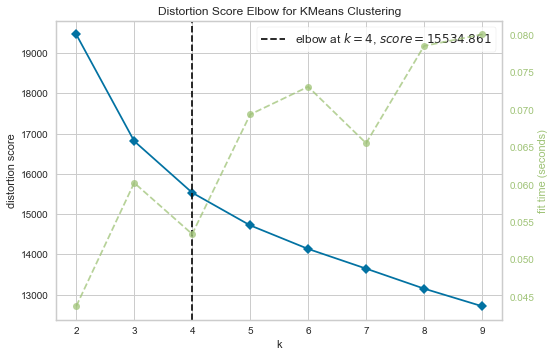

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [353]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

model = KMeans(init="k-means++", random_state=42, max_iter=10000)
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion')
visualizer.fit(scaled_data)
visualizer.show()


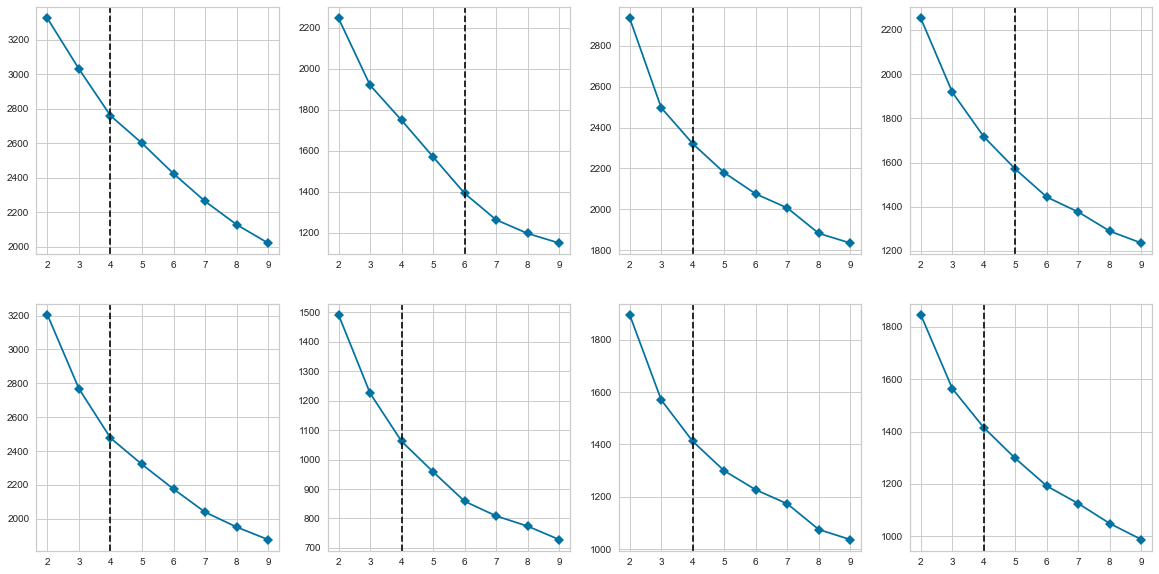

In [332]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,10))

for gen in range(1, 9):
    ax = axes.flat[gen-1]
    
    d1 = data[data['generation']==gen].drop(columns=['generation'])
    scaler = StandardScaler()
    scaler.fit(d1)
    d2 = pd.DataFrame(scaler.transform(d1), columns=d1.columns)

    model = KMeans(init="k-means++", random_state=42, max_iter=10000)
    visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False, ax=ax)
    visualizer.fit(d2)

In [327]:
# from sklearn.metrics import davies_bouldin_score
# import matplotlib.pyplot as plt

# X = scaled_data
# K = range(2, 15)
# results = []

# for k in K:
#     km = KMeans(init="k-means++", n_clusters=k, random_state=42).fit(X)
#     results.append(davies_bouldin_score(X, km.labels_))

# plt.plot(K, results, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Davies-Bouldin index')
# plt.title('Elbow point')
# plt.show()    
# results    

[[  48.26003135  -47.74419327]
 [ 494.1498465   494.25250195]
 [ 239.85424112  -16.05322847]
 [-214.75920372   36.13757588]]


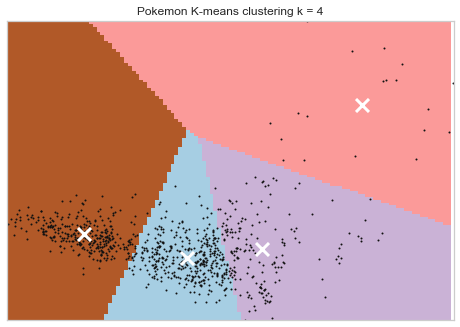

In [249]:
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler


# k = 4
# kmeans = KMeans(init="k-means++", n_clusters=k)
# reduced_data = PCA(n_components=2).fit_transform(data)
# kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = 10  # point in the mesh [x_min, x_max]x[y_min, y_max].

# # # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # # Put the result into a color plot
# Z = Z.reshape(xx.shape)

# plt.figure(1)
# plt.clf()
# plt.imshow(
#     Z,
#     interpolation="nearest",
#     extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#     cmap=plt.cm.Paired,
#     aspect="auto",
#     origin="lower",
# )

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=4)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# print(centroids)
# plt.scatter(
#     centroids[:, 0],
#     centroids[:, 1],
#     marker="x",
#     s=169,
#     linewidths=3,
#     color="w",
#     zorder=10,
# )
# plt.title(f"Pokemon K-means clustering k = {k}")
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()


In [241]:
data[data['generation']==1]

,generation,type1,type2,height,weight,catch_rate,egg_group1,egg_group2,has_gender,male,...,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max,total,is_legendary
0,1,3,8,0.7,6.9,45,1,3,1,87.5,...,121,251,65,121,251,45,85,207,318,0
23,1,3,8,1.0,13.0,45,1,3,1,87.5,...,148,284,80,148,284,60,112,240,405,0
25,1,3,8,2.0,100.0,45,1,3,1,87.5,...,184,328,100,184,328,80,148,284,525,0
24,1,10,0,0.6,8.5,45,4,3,1,87.5,...,112,240,50,94,218,65,121,251,309,0
22,1,10,0,1.1,19.0,45,4,3,1,87.5,...,148,284,65,121,251,80,148,284,405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,1,7,0,1.8,3.3,45,4,8,1,50.0,...,94,218,50,94,218,50,94,218,300,0
817,1,7,0,4.0,16.5,45,4,8,1,50.0,...,130,262,70,130,262,70,130,262,420,0
814,1,7,9,2.2,210.0,45,4,8,1,50.0,...,184,328,100,184,328,80,148,284,600,0
809,1,4,0,2.0,122.0,3,0,0,0,0.0,...,281,447,90,166,306,130,238,394,680,1


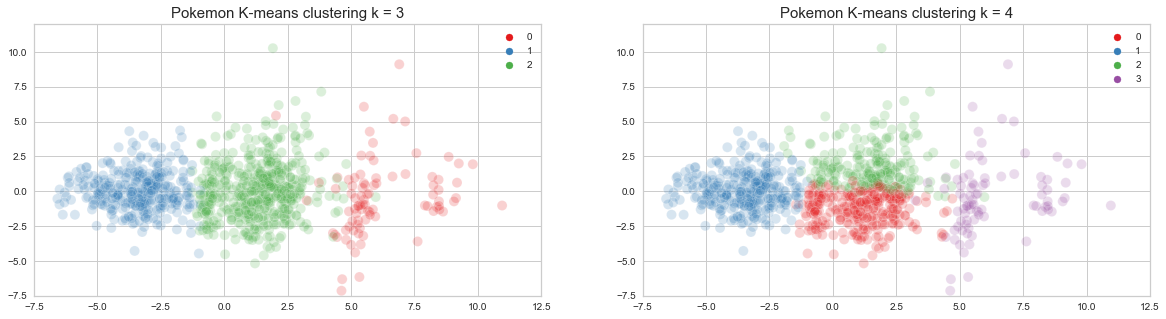

In [354]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

for k in range(3, 5):
    ax = axes.flat[k-3]
    ax.set_xlim([-7.5, 12.5])
    ax.set_ylim([-7.5, 12])    
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=42, max_iter=10000).fit(scaled_data)
    d = PCA(n_components=2).fit_transform(scaled_data)
    sns.scatterplot(x=d[:,0], y=d[:,1], 
                hue=kmeans.labels_, 
                palette='Set1',
                s=100, alpha=0.2, ax=ax).set_title(f"Pokemon K-means clustering k = {k}", fontsize=15)


with open('./map/pokemons.json', 'w') as f:
    f.write(pokemon[['number', 'name', 'image', 'generation']].to_json(orient="records"))
with open('./map/points.json', 'w') as f:
    json.dump(d.tolist(), f)

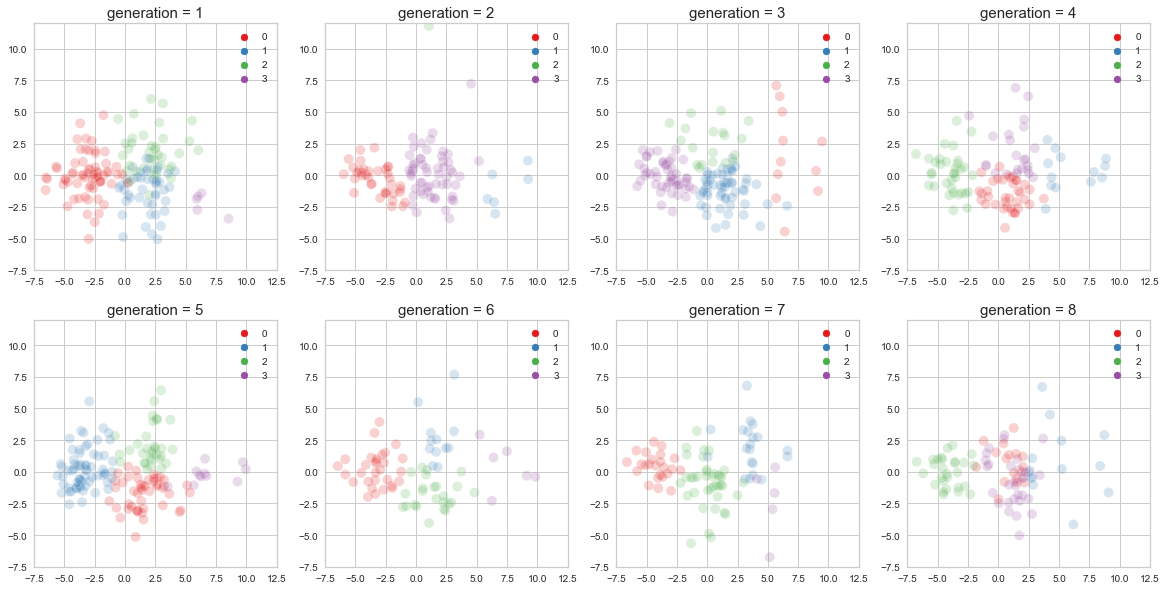

In [ ]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,10))

for gen in range(1, 9):
    ax = axes.flat[gen-1]
    ax.set_xlim([-7.5, 12.5])
    ax.set_ylim([-7.5, 12])
    
    d1 = data[data['generation']==gen].drop(columns=['generation'])
    scaler = StandardScaler()
    scaler.fit(d1)
    d2 = pd.DataFrame(scaler.transform(d1), columns=d1.columns)

    k = 4
    kmeans = KMeans(init="k-means++", n_clusters=k).fit(d2)
    d3 = PCA(n_components=2).fit_transform(d2)

    sns.scatterplot(x=d3[:,0], y=d3[:,1], 
                    hue=kmeans.labels_, 
                    palette='Set1',
                    s=100, alpha=0.2,ax=ax).set_title(f"generation = {gen}", fontsize=15)


In [ ]:
# import json
# import pandas as pd
# import seaborn as sns
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.cluster import MeanShift

# k = 3
# kmeans = MeanShift().fit(scaled_data)
# labels_scale = kmeans.labels_
# reduced_data = PCA(n_components=2).fit_transform(scaled_data)

# plt.figure(figsize = (10,10))
# sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], 
#                 hue=labels_scale, 
#                 palette='Set1',
#                 s=100, alpha=0.2).set_title(f"Pokemon K-means clustering k = {k}", fontsize=15)
# plt.legend()
# plt.ylabel('PCA2')
# plt.xlabel('PCA1')
# plt.show()

# with open('./map/pokemons.json', 'w') as f:
#     f.write(pokemon[['number', 'name', 'image', 'generation']].to_json(orient="records"))
# with open('./map/points.json', 'w') as f:
#     json.dump(reduced_data.tolist(), f)

In [ ]:
pca = PCA(n_components=len(scaled_data.columns))

pca.fit(scaled_data)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
print(var)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [ ]:
from sklearn.metrics import silhouette_score


pca = PCA(n_components=4)
pca_scale = pca.fit_transform(scaled_data)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3', 'pc4'])


kmeans_pca_scale = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()


In [ ]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

k = 3
reduced_data = TSNE(n_components=2, learning_rate='auto', init="random").fit_transform(scaled_data)
# reduced_data = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200).fit_transform(data)
# kmeans = KMeans(init="k-means++", n_clusters=k).fit(reduced_data)
kmeans = KMeans(init="k-means++", n_clusters=k).fit(scaled_data)
labels_scale = kmeans.labels_

plt.figure(figsize = (10,10))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title(f"Pokemon K-means clustering k = {k}", fontsize=15)
plt.legend()
plt.ylabel('TSNE2')
plt.xlabel('TSNE1')
plt.show()